In [ ]:
import numpy as np
import os
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
data_src = "https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip"
data_dir = tf.keras.utils.get_file(origin=data_src,cache_dir="/content/", extract=True)
data_dir = pathlib.Path(data_dir)


109540975/109540975 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
!ls /root/.keras/datasets/pizza_steak.zip/pizza_steak/
# data_dir


ls: cannot access '/root/.keras/datasets/pizza_steak.zip/pizza_steak/': No such file or directory


In [ ]:

for dirpath,dirname,filenames in os.walk(data_dir):
  print(f"There are {dirname} directories and {len(filenames)} images in '{dirpath}'.")

There are ['pizza_steak'] directories and 0 images in '/content/datasets/pizza_steak.zip'.
There are ['train', 'test'] directories and 0 images in '/content/datasets/pizza_steak.zip/pizza_steak'.
There are ['steak', 'pizza'] directories and 0 images in '/content/datasets/pizza_steak.zip/pizza_steak/train'.
There are [] directories and 750 images in '/content/datasets/pizza_steak.zip/pizza_steak/train/steak'.
There are [] directories and 750 images in '/content/datasets/pizza_steak.zip/pizza_steak/train/pizza'.
There are ['steak', 'pizza'] directories and 0 images in '/content/datasets/pizza_steak.zip/pizza_steak/test'.
There are [] directories and 250 images in '/content/datasets/pizza_steak.zip/pizza_steak/test/steak'.
There are [] directories and 250 images in '/content/datasets/pizza_steak.zip/pizza_steak/test/pizza'.


In [ ]:
# os.listdir(data_dir + "/pizza_steak/train")

In [ ]:
image_count = len(list(pathlib.Path(data_dir).glob('*/*/*/*')))
print(image_count)

2000


/content/datasets/pizza_steak.zip/pizza_steak/train/steak/332557.jpg


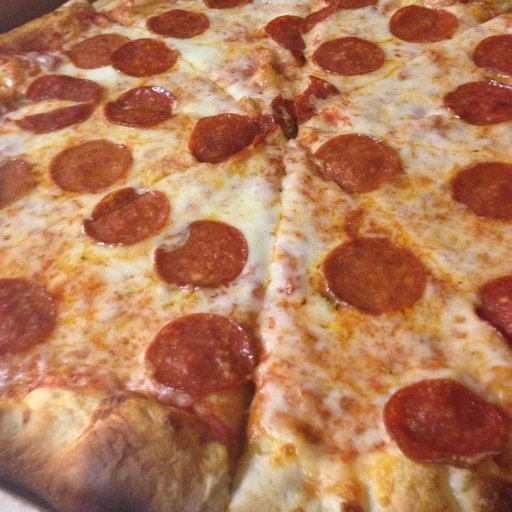

In [ ]:
from PIL import Image
train_images = list(pathlib.Path(data_dir).glob('*/*/*/*'))
print(str(train_images[0]))
Image.open(train_images[751])

In [ ]:
train_dir = str(list(data_dir.glob("*/*train"))[0])
test_dir = str(list(data_dir.glob("*/*test"))[0])


In [ ]:
tf.random.set_seed(42)
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# scaling the images
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)


# get the images from direcrory and put them in batch_sizes
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size = (224,224),
    class_mode = "binary",
    batch_size = 32,
    seed=42
    )
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size = (224,224), # all image will 224X224 pixel
    class_mode = "binary", # binary beacuse we have two classes
    batch_size = 32, # batch_size 32 mean tha 32 images are load to memory at same time than 32 and so on  train_image/32
    seed=42
    )

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
len(train_data) # total 47 batches train_images 1500/ 32 = 47

47

In [ ]:
train_data[43][0].shape  #(32= 32 image load, width = 224, height= 224, color channel = 3 red, green, blue)

(32, 224, 224, 3)

In [ ]:
sum(train_data.classes[749:])

750

In [ ]:
classes = list(train_data.class_indices.keys())
images, labels = train_data[0]


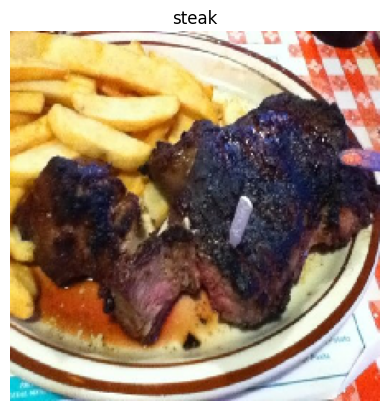

In [ ]:
plt.imshow(images[1])
plt.title(classes[int(labels[1])])
plt.axis("off")
plt.show()

In [ ]:
# shape of image
train_data[0][0][0].shape

(224, 224, 3)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.Input(shape=(224,224,3)),
    tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation="relu",padding="valid"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")

])

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 10)        │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 220, 220, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 218, 218, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 475240)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │         475,241 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 477,341 (1.82 MB)

 Trainable params: 477,341 (1.82 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
224-3+1

222

In [ ]:
model.compile(
    loss = tf.keras.losses.binary_crossentropy,
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["accuracy"],

)

history = model.fit(
    train_data,
    epochs=5,
    # steps_per_epoch=len(train_data),
    validation_data=test_data,
    # validation_steps=len(test_data)
    )


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 124s 3s/step - accuracy: 0.4661 - loss: 0.9515 - val_accuracy: 0.5680 - val_loss: 0.6835
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 113s 2s/step - accuracy: 0.6575 - loss: 0.6434 - val_accuracy: 0.6800 - val_loss: 0.6715
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 114s 2s/step - accuracy: 0.7730 - loss: 0.4862 - val_accuracy: 0.7180 - val_loss: 0.5860
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 108s 2s/step - accuracy: 0.8788 - loss: 0.2969 - val_accuracy: 0.8000 - val_loss: 0.4738
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 114s 2s/step - accuracy: 0.9619 - loss: 0.1307 - val_accuracy: 0.6900 - val_loss: 0.7949


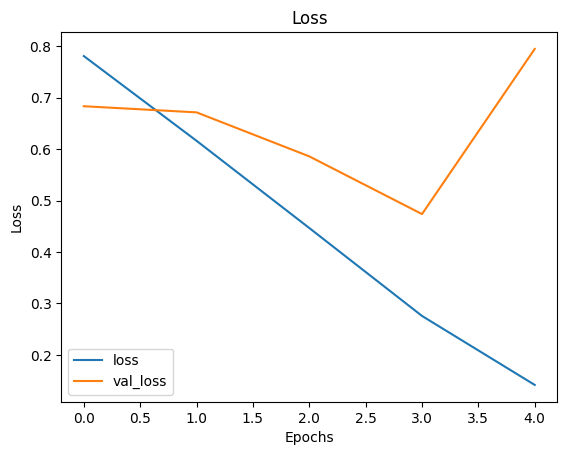

In [ ]:
# check the loss for training and validataion
import pandas as pd
pd.DataFrame(history.history)[["loss","val_loss"]].plot()
plt.title("Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

From the graph we get the idea that the model is performing well on the training dataset.This means that the model learn to much from training dataset and the model is not perform well on unseen data like test dataset so this mean that the model is **overfitting** (perform well on training data and not on test data)

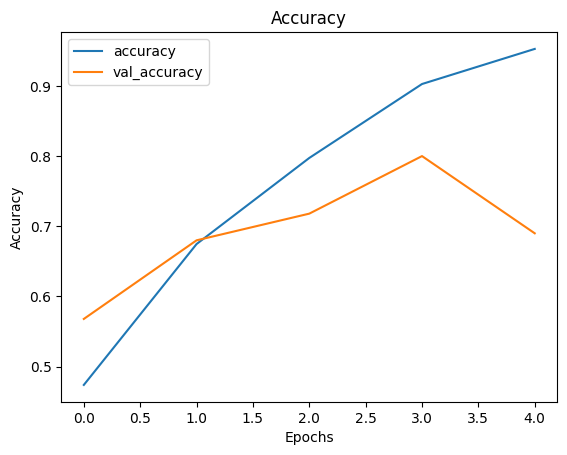

In [ ]:
# accuracy for training and validation
pd.DataFrame(history.history)[["accuracy","val_accuracy"]].plot()
plt.title("Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
y_pred = model.predict(test_data)
y_pred = np.round(y_pred).astype(int)



16/16 ━━━━━━━━━━━━━━━━━━━━ 12s 717ms/step


In [ ]:
cm = confusion_matrix(test_data.classes, y_pred)

In [ ]:
cm

array([[182,  68],
       [189,  61]])

In [ ]:
def loss_and_validation_graph(history):
  pd.DataFrame(history.history)[["loss","val_loss"]].plot()
  plt.title("Loss")
  plt.xlabel("Epochs")
  plt.ylabel("Loss")
  plt.show()



  plt.figure()
  pd.DataFrame(history.history)[["accuracy","val_accuracy"]].plot()
  plt.title("Accuracy")
  plt.xlabel("Epochs")
  plt.ylabel("Accuracy")
  plt.show()

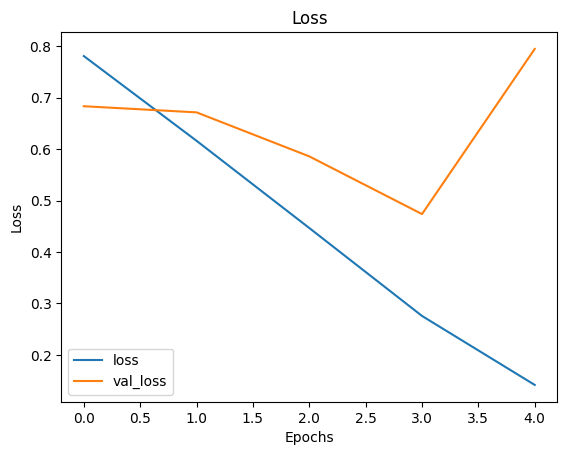

<Figure size 640x480 with 0 Axes>

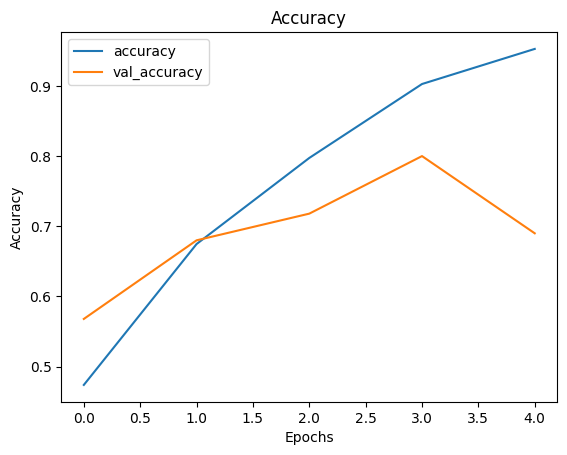

In [ ]:
loss_and_validation_graph(history)

### Adjust the model parameters

0. create a baseline
1. Beat the baseline by overfitting a large model
2. Reduce overfitting

ways to induce overfitting

* Increase Convolution layers
* Increase Convolution layers filters like this 16, 32, 64 etc
* Increase dense layer after the flatten layer

way to reduce overfitting
* add Data augmentation
* add Regularization layers like Dropout, maxpool2d







In [ ]:
model_two = tf.keras.Sequential([
    tf.keras.Input(shape=(224,224,3)),
    tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation="relu",padding="valid"),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")

])


model_two.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

history_two = model_two.fit(
    train_data,
    epochs=5,
    validation_data=test_data
)


Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 49s 1s/step - accuracy: 0.5256 - loss: 0.7021 - val_accuracy: 0.6700 - val_loss: 0.6109
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 47s 1s/step - accuracy: 0.7448 - loss: 0.5533 - val_accuracy: 0.8520 - val_loss: 0.3526
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 46s 981ms/step - accuracy: 0.7956 - loss: 0.4423 - val_accuracy: 0.8480 - val_loss: 0.3492
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 48s 1s/step - accuracy: 0.8453 - loss: 0.3772 - val_accuracy: 0.8520 - val_loss: 0.3530
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 46s 991ms/step - accuracy: 0.8453 - loss: 0.3750 - val_accuracy: 0.8840 - val_loss: 0.2994


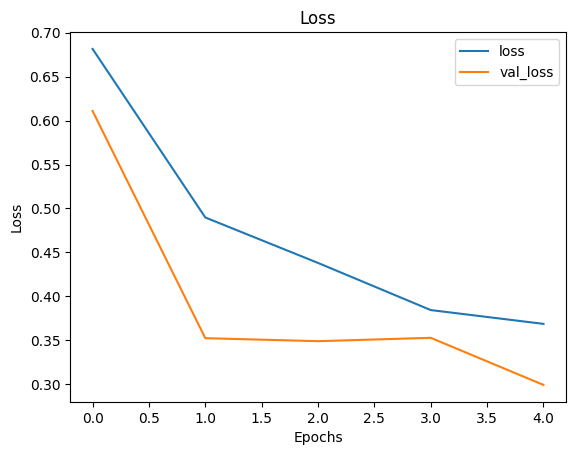

<Figure size 640x480 with 0 Axes>

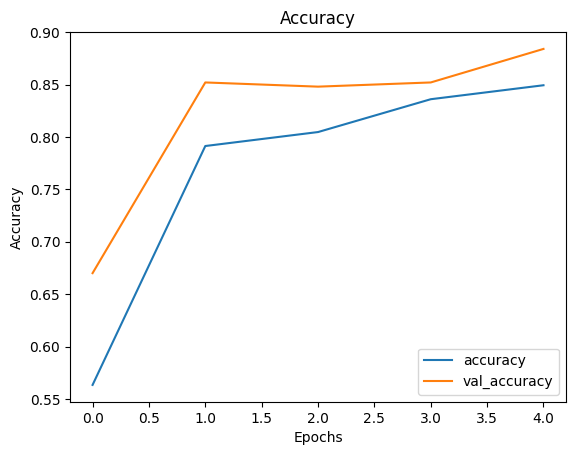

In [ ]:
loss_and_validation_graph(history_two)

In [ ]:
model_two.evaluate(test_data)

16/16 ━━━━━━━━━━━━━━━━━━━━ 7s 408ms/step - accuracy: 0.8663 - loss: 0.3317


[0.29944372177124023, 0.8840000033378601]

In [ ]:
model_two.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 222, 222, 10)        │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 111, 111, 10)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 109, 109, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 54, 54, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 52, 52, 10)          │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 26, 26, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 6760)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │           6,761 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 26,585 (103.85 KB)

 Trainable params: 8,861 (34.61 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 17,724 (69.24 KB)

### Data Augmentation
Data Augmentation is the process of  artifically generating new data from the existing data.For example by flip, rotation of images etc

In [159]:
# create image generation using ImageDataGenerator
train_datagen_augmented = ImageDataGenerator(
    rescale=1./255,
    rotation_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

# train data
train_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)



In [ ]:
# get the images from direcrory and put them in batch_sizes
train_data_augmented = train_datagen_augmented.flow_from_directory(
    train_dir,
    target_size = (224,224),
    class_mode = "binary",
    batch_size = 32,
    seed=42,
    shuffle=False
    )

train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size = (224,224),
    class_mode = "binary",
    batch_size = 32,
    seed=42,
    shuffle=False
    )

test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size = (224,224),
    class_mode = "binary",
    batch_size = 32
    )



Found 1500 images belonging to 2 classes.
Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
len(train_data), len(train_datagen_augmented), len(test_data)

(47, 47, 16)

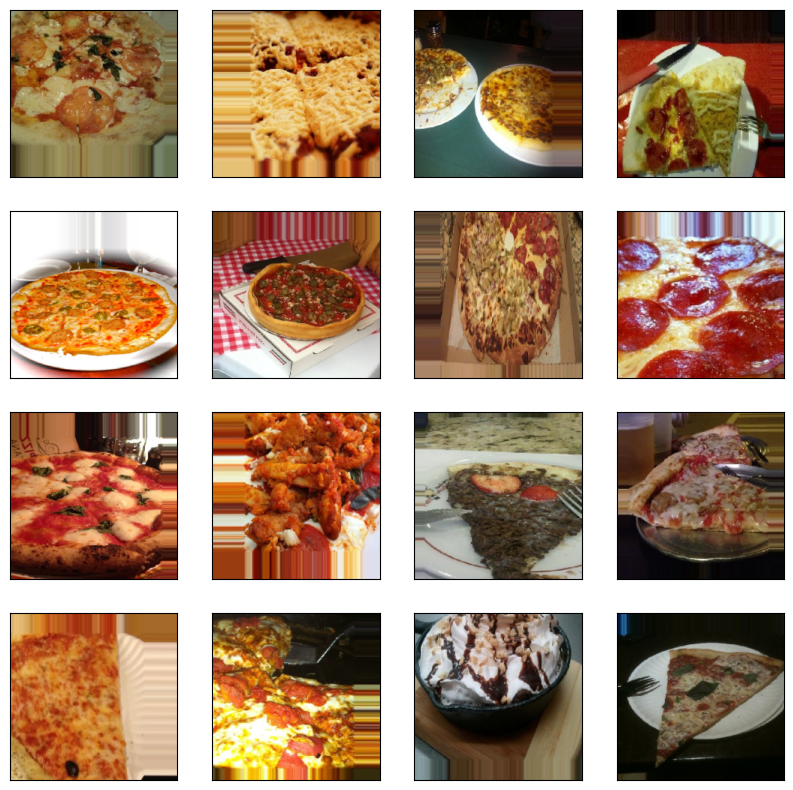

In [ ]:
#

plt.figure(figsize=(10,10))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_data_augmented[0][0][i])
plt.show()

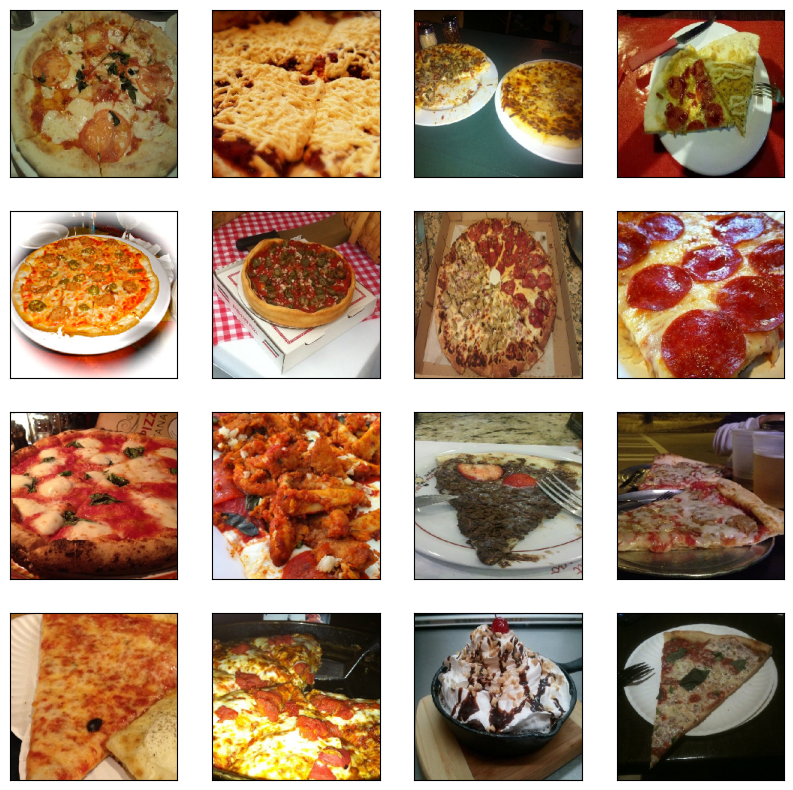

In [ ]:
#

plt.figure(figsize=(10,10))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_data[0][0][i])
plt.show()

### Train model on augmented data

In [ ]:
model_three = tf.keras.Sequential(
    [
        tf.keras.Input(shape=(224,224,3)),

        tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation="relu",padding="valid"),
        tf.keras.layers.MaxPool2D(pool_size=2),

        tf.keras.layers.Conv2D(10, 3, activation="relu"),
        tf.keras.layers.MaxPool2D(pool_size=2),

        tf.keras.layers.Conv2D(10, 3, activation="relu"),
        tf.keras.layers.MaxPool2D(pool_size=2),

        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(1, activation="sigmoid")
    ]
)

model_three.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

history_three = model_three.fit(
    train_data_augmented,
    epochs=5,
    validation_data=test_data
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 65s 1s/step - accuracy: 0.4158 - loss: 0.7121 - val_accuracy: 0.6980 - val_loss: 0.6852
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 65s 1s/step - accuracy: 0.5375 - loss: 0.6906 - val_accuracy: 0.5620 - val_loss: 0.6834
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 62s 1s/step - accuracy: 0.5218 - loss: 0.6856 - val_accuracy: 0.6820 - val_loss: 0.6785
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 60s 1s/step - accuracy: 0.5934 - loss: 0.6870 - val_accuracy: 0.7140 - val_loss: 0.6563
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 62s 1s/step - accuracy: 0.6084 - loss: 0.6649 - val_accuracy: 0.7660 - val_loss: 0.6441


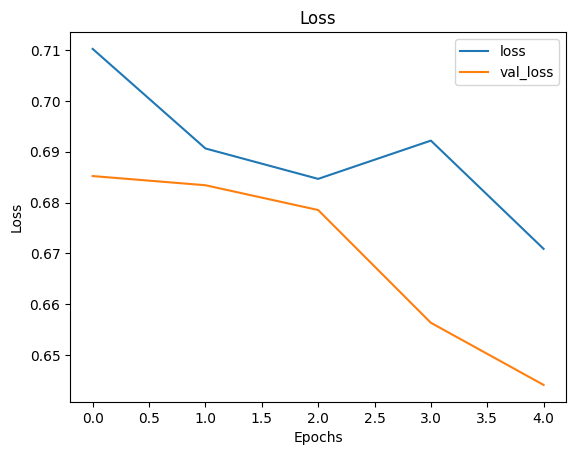

<Figure size 640x480 with 0 Axes>

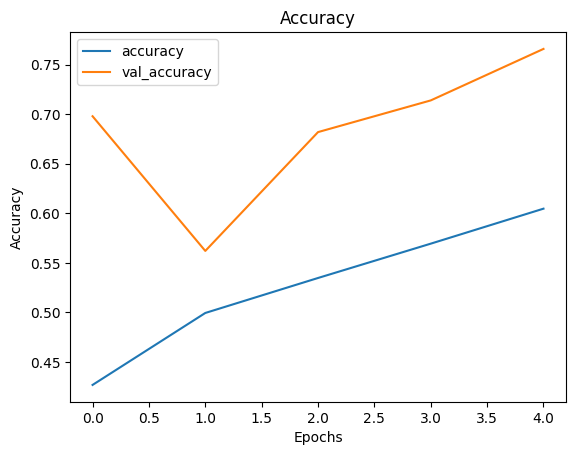

In [ ]:
loss_and_validation_graph(history_three)

### Train model on shuffle Images


In [160]:
train_data_shuffle = train_datagen_augmented.flow_from_directory(
    train_dir,
    target_size = (224,224),
    class_mode = "binary",
    batch_size = 32,
    seed=42,
    shuffle=True
    )

model_four = tf.keras.Sequential(
    [
        tf.keras.Input(shape=(224,224,3)),
        tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation="relu",padding="valid"),
        tf.keras.layers.MaxPool2D(pool_size=2),
        tf.keras.layers.Conv2D(10, 3, activation="relu"),
        tf.keras.layers.MaxPool2D(pool_size=2),
        tf.keras.layers.Conv2D(10, 3, activation="relu"),
        tf.keras.layers.MaxPool2D(pool_size=2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(1, activation="sigmoid")
    ]
)

model_four.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

history_four = model_four.fit(
    train_data_shuffle,
    epochs=5,
    validation_data=test_data
)


Found 1500 images belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 67s 1s/step - accuracy: 0.5897 - loss: 0.6661 - val_accuracy: 0.7380 - val_loss: 0.5244
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 80s 1s/step - accuracy: 0.7275 - loss: 0.5560 - val_accuracy: 0.8500 - val_loss: 0.3629
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 61s 1s/step - accuracy: 0.7766 - loss: 0.4780 - val_accuracy: 0.8560 - val_loss: 0.3380
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 61s 1s/step - accuracy: 0.7769 - loss: 0.4755 - val_accuracy: 0.8660 - val_loss: 0.3363
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 62s 1s/step - accuracy: 0.7763 - loss: 0.4802 - val_accuracy: 0.8600 - val_loss: 0.3071


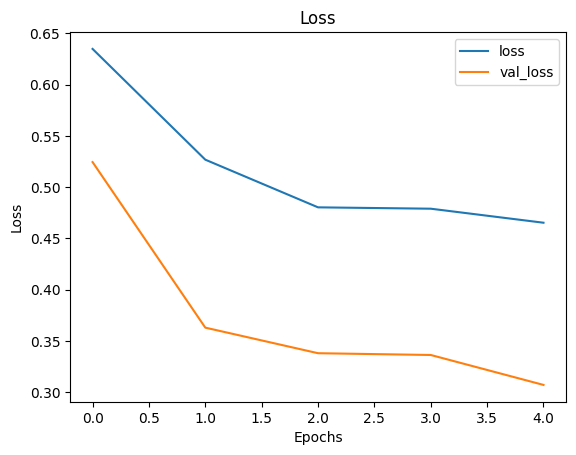

<Figure size 640x480 with 0 Axes>

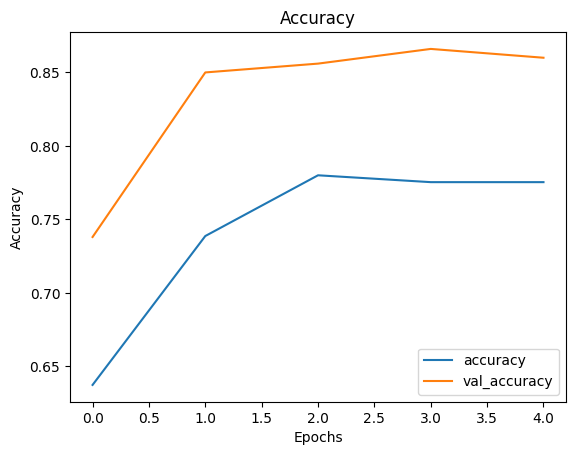

In [161]:
loss_and_validation_graph(history_four)

In [162]:
model_four.evaluate(test_data)

16/16 ━━━━━━━━━━━━━━━━━━━━ 10s 611ms/step - accuracy: 0.8723 - loss: 0.2930


[0.30707263946533203, 0.8600000143051147]

In [173]:
test_data[15][0].shape

(20, 224, 224, 3)

In [176]:
len(test_data[0])

2

In [179]:
test_data[0][0].shape

(32, 224, 224, 3)

## Predict On new Custom Data

In [204]:
image_one = tf.expand_dims(tf.zeros((224,224,3)),0)
image_two = tf.expand_dims(tf.zeros((224,224,3)) + 1,0)

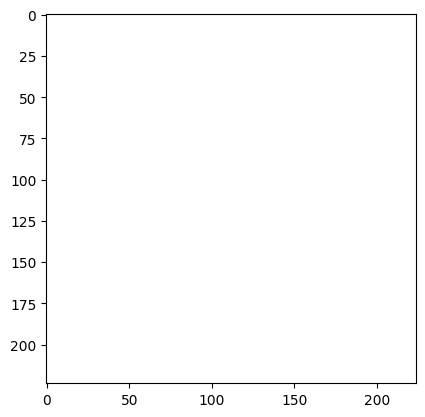

In [209]:
tf.concat([image_one, image_two], axis=0)[0]



In [198]:
tf.concat([image_one, image_two], axis=0).shape

TensorShape([10, 5, 3])